In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### 필요한 함수

In [21]:
import numpy as np
from sklearn.metrics import RocCurveDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc


def get_metric(targets, preds):
    auc = roc_auc_score(targets, preds)
    acc = accuracy_score(targets, np.where(preds >= 0.5, 1, 0))
    precsion = precision_score(targets, np.where(preds >= 0.5, 1, 0))
    recall = recall_score(targets, np.where(preds >= 0.5, 1, 0))
    F1_score = f1_score(targets, np.where(preds >= 0.5, 1, 0))

    return auc, acc, precsion, recall, F1_score

### Submission 파일 불러오기

In [23]:
# 비교하고 싶은 파일들을 넣어주세요

sub1 = pd.read_csv('').prediction 
sub2 = pd.read_csv('').prediction 
sub3 = pd.read_csv('').prediction 

# 이 부분은 그대로 두면 됩니다.
targets = pd.read_csv('/opt/ml/input/data/valid_target.csv').target

### 그래프, auroc 보기
- 추가로 acc, precision, recall, f1_score 까지 보면 더욱 정밀한 앙상블 or FE 를 할수 있습니다.

LGBM : auc : 0.69776 acc : 0.59543 precision : 0.5595 recall : 0.85598 F1_score : 0.67669
    
LGBM_FE : auc : 0.80853 acc : 0.73522 precision : 0.69476 recall : 0.8288 F1_score : 0.75589
    
LGBM_TIME : auc : 0.74068 acc : 0.68414 precision : 0.62764 recall : 0.88859 F1_score : 0.73566
    
LGBM_TIME_MEAN : auc : 0.78728 acc : 0.70296 precision : 0.64789 recall : 0.875 F1_score : 0.74451
    
LSTM : auc : 0.73469 acc : 0.66398 precision : 0.64975 recall : 0.69565 F1_score : 0.67192
    
BERT : auc : 0.69933 acc : 0.66667 precision : 0.65464 recall : 0.69022 F1_score : 0.67196
    


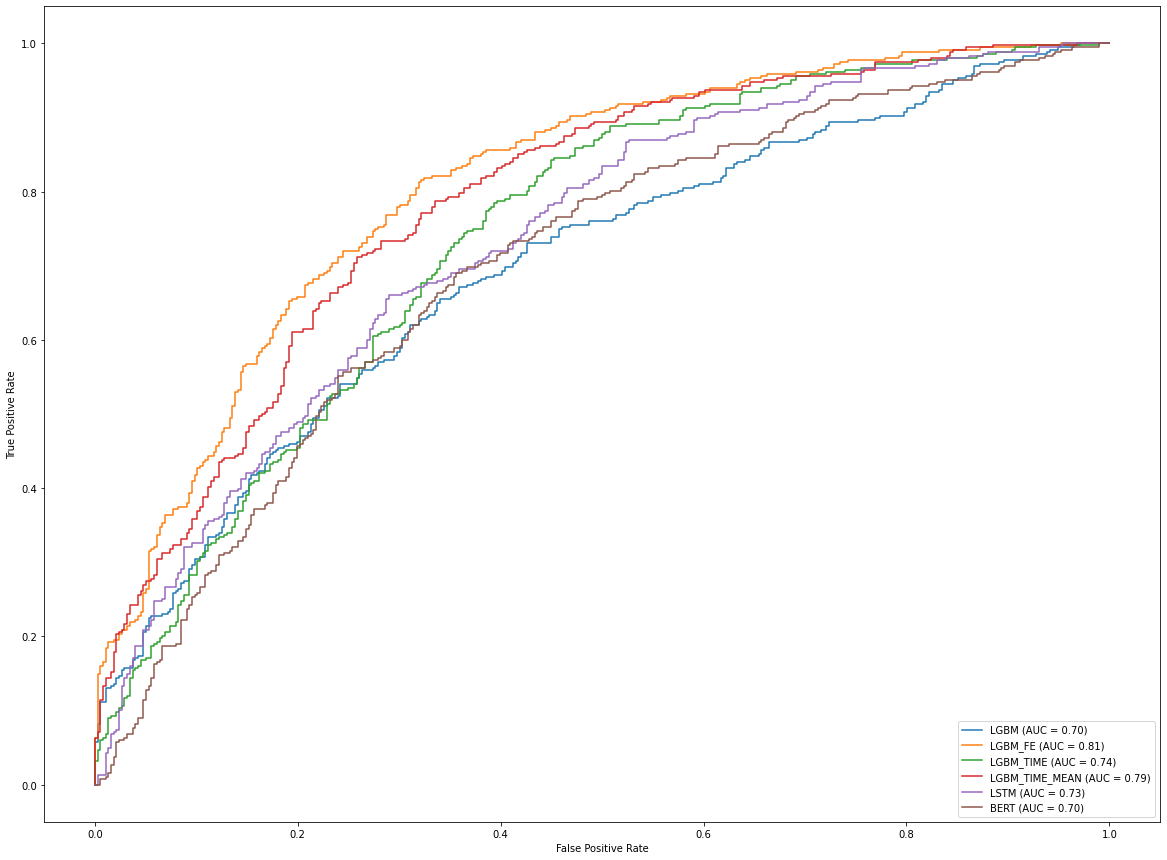

In [19]:
fig, ax = plt.subplots(figsize=(20, 15)) # 크기 각자 조절

names = ['sub1','sub2','sub3'] # 그래프에 표시하고 싶은 이름을 넣어주세요
submissions = [sub1,sub2,sub3] # preds 를 넣어주세요

# 시각화
for name, i in zip(names, submissions):
    valid_pred = i

    aucroc, acc, precision,recall,F1_score = get_metric(targets, valid_pred)

    fpr, tpr, thresholds = roc_curve(targets, valid_pred)
    roc_auc = auc(fpr, tpr)
    
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name=f'{name}')

    display.plot(ax)

    print(f'''{name} : auc : {round(aucroc,5)} acc : {round(acc,5)} precision : {round(precision,5)} recall : {round(recall,5)} F1_score : {round(F1_score,5)}
    ''')